In [1]:
# extract zip code
from zipfile import ZipFile
filename = "/content/a01c26dcd27711ea.zip"

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("Done!")

Done!


##Import libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Data preprocessing

In [3]:
# Read Data from csv to dataframe
df = pd.read_csv("/content/Dataset/train.csv")
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
#taking days count by using two give dates
import datetime as dt

a = []
b=df['issue_date']
c=df['listing_date']
for i in range(0,18834):
  x,y = b[i].split()
  y1,m1,d1 = (x).split('-')
  x,y = c[i].split()
  y2,m2,d2 = (x).split('-')
  start = dt.date(int(y1),int(m1),int(d1))
  end   = dt.date(int(y2),int(m2),int(d2))
  nd=np.busday_count(start , end)
  a.append(nd)

print(len(a))
df['daycount']= a
df['area'] = df['height(cm)']*df['length(m)']

18834


In [5]:
#df.shape
#df['condition'].value_counts()
df.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
daycount             0
area                 0
dtype: int64

In [6]:
df.dtypes

pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
daycount            int64
area              float64
dtype: object

In [7]:
df = df.replace(to_replace = np.nan, value = -1.0) 

In [8]:
df['condition'].value_counts()

 1.0    6819
 0.0    6281
 2.0    4257
-1.0    1477
Name: condition, dtype: int64

In [9]:
df.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category', 'pet_category',
       'daycount', 'area'],
      dtype='object')

In [10]:
df = df.drop(['pet_id','issue_date','listing_date'],axis=1)

In [11]:
# Labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns
print(var_mod)
for i in var_mod:
    df[i] = le.fit_transform(df[i])

Index(['color_type'], dtype='object')


In [12]:
df.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,daycount,area
0,2.0,18,0.80,7.78,13,9,0.0,1,52,6.2240
1,1.0,53,0.72,14.19,13,9,0.0,2,1330,10.2168
2,-1.0,15,0.15,40.90,15,4,2.0,4,537,6.1350
3,1.0,53,0.62,17.82,0,1,0.0,2,539,11.0484
4,2.0,2,0.50,11.06,18,4,0.0,1,37,5.5300


In [14]:
df.describe()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,daycount,area
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.735691,24.560529,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143,610.951896,13.779984
std,0.896321,19.432010,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919,783.340614,10.940373
min,-1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-54.000000,0.000000
25%,0.000000,4.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000,85.000000,4.944725
50%,1.000000,18.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000,280.000000,10.942500
75%,1.000000,48.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000,798.000000,20.483575
max,2.000000,55.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000,5754.000000,49.780000


<Axes: >

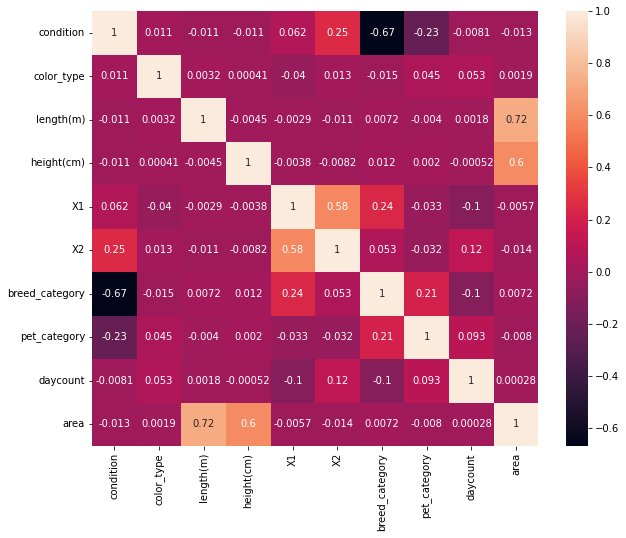

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [24]:
y1 = df['breed_category']
y2 = df['pet_category']
x = df.drop(['breed_category','pet_category'],axis=1)

In [25]:
x = np.asanyarray(x)
y1 = np.asanyarray(y1)
y2 = np.asanyarray(y2)

In [26]:
print(len(x),len(y1),len(y2))

18834 18834 18834


###Machine learning models to predict breed category

In [43]:
#splitting Train and Test data into 80% and 20% respectively
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

xtrain, xtest, ytrain, ytest = train_test_split(x,y1,test_size=0.2,random_state = 1)

xtrain, ytrain = shuffle(xtrain,ytrain,random_state=0)
xtest, ytest = shuffle(xtest,ytest,random_state=0)

In [44]:
#import classification metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
#Function to print classification report 
def metrice_report(ytest,yhat):
  print("Accuracy",metrics.accuracy_score(ytest,yhat))
  print("Confusion matrix")
  print(metrics.confusion_matrix(ytest,yhat))
  print("Classification Report")
  print(metrics.classification_report(ytest,yhat))

In [46]:
#Decision Tree classifier Alogarithm
from sklearn.tree import DecisionTreeClassifier
de=5
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=de).fit(xtrain,ytrain)
#dtree.fit(xtrain,ytrain)
pt = dtree.predict(xtest)
metrice_report(ytest,pt)

Accuracy 0.895142022829838
Confusion matrix
[[1528  245    0]
 [ 150 1543    0]
 [   0    0  301]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89      1773
         1.0       0.86      0.91      0.89      1693
         2.0       1.00      1.00      1.00       301

    accuracy                           0.90      3767
   macro avg       0.92      0.92      0.92      3767
weighted avg       0.90      0.90      0.90      3767



In [47]:
#K Nearest Neighbour Alogarithm
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier(4)
kclassifier.fit(xtrain,ytrain)
knn = kclassifier.predict(xtest)
metrice_report(ytest,knn)

Accuracy 0.5147332094504911
Confusion matrix
[[1257  486   30]
 [1133  534   26]
 [  84   69  148]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.51      0.71      0.59      1773
         1.0       0.49      0.32      0.38      1693
         2.0       0.73      0.49      0.59       301

    accuracy                           0.51      3767
   macro avg       0.57      0.51      0.52      3767
weighted avg       0.52      0.51      0.50      3767



In [48]:
#Naive Bayes Alogarithm
from sklearn.naive_bayes import GaussianNB
Nclassifier = GaussianNB()
Nclassifier.fit(xtrain, ytrain)
nb = Nclassifier.predict(xtest)
metrice_report(ytest,nb)

Accuracy 0.8792142288293071
Confusion matrix
[[1773    0    0]
 [ 447 1246    0]
 [   0    8  293]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1773
         1.0       0.99      0.74      0.85      1693
         2.0       1.00      0.97      0.99       301

    accuracy                           0.88      3767
   macro avg       0.93      0.90      0.91      3767
weighted avg       0.90      0.88      0.88      3767



In [49]:
#Random Forest classifier Alogarithm 
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,random_state=5)
RFC.fit(xtrain,ytrain)
yhat = RFC.predict(xtest)
metrice_report(ytest,yhat)

Accuracy 0.892221927263074
Confusion matrix
[[1622  151    0]
 [ 255 1438    0]
 [   0    0  301]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      1773
         1.0       0.90      0.85      0.88      1693
         2.0       1.00      1.00      1.00       301

    accuracy                           0.89      3767
   macro avg       0.92      0.92      0.92      3767
weighted avg       0.89      0.89      0.89      3767



In [50]:
#Support vector Machine Alogarithm
from sklearn.svm import SVC
sclassifier = SVC(kernel = 'rbf', random_state = 1)
sclassifier.fit(xtrain, ytrain)
sv = sclassifier.predict(xtest)
metrice_report(ytest,sv)

Accuracy 0.4690735333156358
Confusion matrix
[[1047  726    0]
 [ 973  720    0]
 [ 151  150    0]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.48      0.59      0.53      1773
         1.0       0.45      0.43      0.44      1693
         2.0       0.00      0.00      0.00       301

    accuracy                           0.47      3767
   macro avg       0.31      0.34      0.32      3767
weighted avg       0.43      0.47      0.45      3767



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
#XGBoost Alogarithm
from xgboost import XGBClassifier
xgbclassifier = XGBClassifier()
xgbclassifier.fit(xtrain, ytrain)
yhat = xgbclassifier.predict(xtest)
metrice_report(ytest,yhat)

Accuracy 0.8956729492965224
Confusion matrix
[[1597  176    0]
 [ 217 1476    0]
 [   0    0  301]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1773
         1.0       0.89      0.87      0.88      1693
         2.0       1.00      1.00      1.00       301

    accuracy                           0.90      3767
   macro avg       0.92      0.92      0.92      3767
weighted avg       0.90      0.90      0.90      3767



###Machine learning models to predict pet category

In [52]:
#splitting Train and Test data into 80% and 20% respectively
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

xtrain, xtest, ytrain, ytest = train_test_split(x,y2,test_size=0.2,random_state = 1)

xtrain, ytrain = shuffle(xtrain,ytrain,random_state=0)
xtest, ytest = shuffle(xtest,ytest,random_state=0)

In [53]:
#Decision Tree classifier Alogarithm
from sklearn.tree import DecisionTreeClassifier
de=5
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=de).fit(xtrain,ytrain)
#dtree.fit(xtrain,ytrain)
pt = dtree.predict(xtest)
metrice_report(ytest,pt)

Accuracy 0.8282452880276082
Confusion matrix
[[   4    2    9    5]
 [   0 1140  284   15]
 [   0  288 1826    8]
 [   0    8   28  150]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        20
           1       0.79      0.79      0.79      1439
           2       0.85      0.86      0.86      2122
           4       0.84      0.81      0.82       186

    accuracy                           0.83      3767
   macro avg       0.87      0.66      0.70      3767
weighted avg       0.83      0.83      0.83      3767



In [54]:
#K Nearest Neighbour Alogarithm
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier(4)
kclassifier.fit(xtrain,ytrain)
knn = kclassifier.predict(xtest)
metrice_report(ytest,knn)

Accuracy 0.7048048845234935
Confusion matrix
[[   0    8    7    5]
 [   0 1051  368   20]
 [   3  593 1516   10]
 [   2   50   46   88]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.62      0.73      0.67      1439
           2       0.78      0.71      0.75      2122
           4       0.72      0.47      0.57       186

    accuracy                           0.70      3767
   macro avg       0.53      0.48      0.50      3767
weighted avg       0.71      0.70      0.70      3767



In [55]:
#Naive Bayes Alogarithm
from sklearn.naive_bayes import GaussianNB
Nclassifier = GaussianNB()
Nclassifier.fit(xtrain, ytrain)
nb = Nclassifier.predict(xtest)
metrice_report(ytest,nb)

Accuracy 0.6806477302893549
Confusion matrix
[[   0    6   10    4]
 [   0  727  696   16]
 [   0  402 1716    4]
 [   0   43   22  121]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.62      0.51      0.56      1439
           2       0.70      0.81      0.75      2122
           4       0.83      0.65      0.73       186

    accuracy                           0.68      3767
   macro avg       0.54      0.49      0.51      3767
weighted avg       0.67      0.68      0.67      3767



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
#Random Forest classifier Alogarithm 
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,random_state=5)
RFC.fit(xtrain,ytrain)
yhat = RFC.predict(xtest)
metrice_report(ytest,yhat)

Accuracy 0.8720467215290683
Confusion matrix
[[   5    1    8    6]
 [   1 1206  223    9]
 [   0  190 1926    6]
 [   1    4   33  148]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.25      0.37        20
           1       0.86      0.84      0.85      1439
           2       0.88      0.91      0.89      2122
           4       0.88      0.80      0.83       186

    accuracy                           0.87      3767
   macro avg       0.83      0.70      0.74      3767
weighted avg       0.87      0.87      0.87      3767



In [57]:
#Support vector Machine Alogarithm
from sklearn.svm import SVC
sclassifier = SVC(kernel = 'rbf', random_state = 1)
sclassifier.fit(xtrain, ytrain)
sv = sclassifier.predict(xtest)
metrice_report(ytest,sv)

Accuracy 0.6902044066896735
Confusion matrix
[[   0    3   17    0]
 [   0  878  561    0]
 [   0  400 1722    0]
 [   0   41  145    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.66      0.61      0.64      1439
           2       0.70      0.81      0.75      2122
           4       0.00      0.00      0.00       186

    accuracy                           0.69      3767
   macro avg       0.34      0.36      0.35      3767
weighted avg       0.65      0.69      0.67      3767



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
